In [1]:
import sys
sys.path.insert(0, "/Users/aron/polybox/Projects/b_significant")

import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import pandas as pd

from functions.eval_functions import pval_mac

/var/folders/2_/2txg_9093x37rv1ls3774xkc0000gn/T/ipykernel_59448/1399939410.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Resolution

In [2]:
n_totals = [
    1000,
    2000,
    3000,
    4000,
    5000,
    7000,
    10000,
    15000,
    20000,
    25000,
    30000,
    35000,
    40000,
    50000,
]
delta_bs = np.arange(0, 1.025, 0.025)

all_permutations = [
    i
    for i in it.product(
        n_totals,
        delta_bs,
    )
]
all_permutations = np.array(all_permutations)

# parameter vectors to run through with cl_idx
cl_n_totals = all_permutations[:, 0].astype(int)
cl_delta_bs = all_permutations[:, 1]

In [3]:
n_totals = [
    1000,
    2000,
    3000,
    4000,
    5000,
    7000,
    10000,
    15000,
    20000,
    25000,
    30000,
    35000,
    40000,
    50000,
]
delta_bs = np.arange(0, 1.025, 0.025)

all_permutations = [
    i
    for i in it.product(
        n_totals,
        delta_bs,
    )
]
all_permutations = np.array(all_permutations)

# parameter vectors to run through with cl_idx
cl_n_totals = all_permutations[:, 0].astype(int)
cl_delta_bs = all_permutations[:, 1]

def get_string_data(cl_idx):
    save_str = (
            "results/resolution/constant_idx/"
            "acf_mean" + str(cl_idx) + ".csv"
        )
    return save_str


def get_df():
    all_delta_bs = []
    all_n_totals = []
    all_acfs = []
    all_n_series_used = []

    for cl_idx in range(len(cl_n_totals)):
        save_str = get_string_data(cl_idx)
        try :
            acfs = np.genfromtxt('../'+save_str, delimiter=',')
        except :
            acfs = []
        try :
            n_series_used = np.genfromtxt('../'+save_str.replace("acf_mean", "n_used_mean"), delimiter=',')
        except :
            n_series_used = []

        all_delta_bs.extend([cl_delta_bs[cl_idx]]*len(acfs))
        all_n_totals.extend([cl_n_totals[cl_idx]]*len(acfs))
        all_acfs.extend(acfs)
        all_n_series_used.extend(n_series_used)

    print(all_n_totals)
    # make a dataframe
    df = pd.DataFrame({
        "acf": all_acfs,
        "delta b": all_delta_bs,
        "n_total": all_n_totals,
        "n_series_used": all_n_series_used,
    })
    return df

In [4]:
df = get_df()

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 100

In [5]:
df

,acf,delta b,n_total,n_series_used
0,-0.059599,0.0,1000,99.111111
1,0.009205,0.0,1000,99.111111
2,-0.044493,0.0,1000,99.111111
3,-0.011532,0.0,1000,99.111111
4,0.077542,0.0,1000,99.111111
...,...,...,...,...
286995,0.963444,1.0,50000,99.002004
286996,0.953735,1.0,50000,99.002004
286997,0.956988,1.0,50000,99.002004
286998,0.957409,1.0,50000,99.002004


In [6]:
# add a new collum to the dataframe

df["p_val"] = pval_mac(np.array(df["acf"]), np.array(df["n_series_used"]),cutting="constant_idx")

In [7]:
df

,acf,delta b,n_total,n_series_used,p_val
0,-0.059599,0.0,1000,99.111111,0.731965
1,0.009205,0.0,1000,99.111111,0.404723
2,-0.044493,0.0,1000,99.111111,0.666393
3,-0.011532,0.0,1000,99.111111,0.507192
4,0.077542,0.0,1000,99.111111,0.136713
...,...,...,...,...,...
286995,0.963444,1.0,50000,99.002004,0.000000
286996,0.953735,1.0,50000,99.002004,0.000000
286997,0.956988,1.0,50000,99.002004,0.000000
286998,0.957409,1.0,50000,99.002004,0.000000


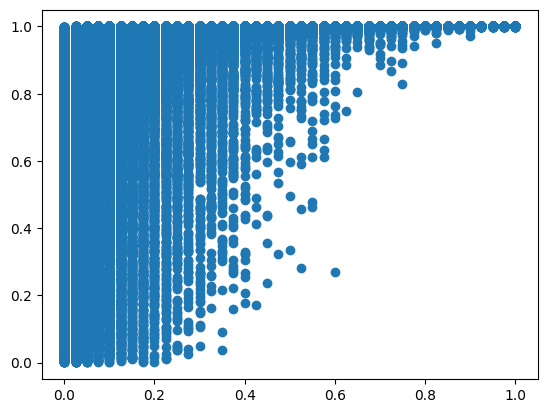

In [8]:
plt.scatter(df['delta b'], 1-df['p_val'])

In [9]:
n_totals


[1000,
 2000,
 3000,
 4000,
 5000,
 7000,
 10000,
 15000,
 20000,
 25000,
 30000,
 35000,
 40000,
 50000]

In [10]:
# make contour plot od p-values

# make a grid of the parameters
delta_bs = np.unique(df['delta b'])
n_totals = np.unique(df['n_total'])

# for each parameter, get the quantiles of the p-values
p_val_grid = np.zeros((len(delta_bs), len(n_totals)))
for ii, delta_b in enumerate(delta_bs):
    for jj, n_total in enumerate(n_totals):
        p_val_grid[ii, jj] = np.quantile(1-df[(df['delta b'] == delta_b) & (df['n_total'] == n_total)]['p_val'], 0.05)


Text(0, 0.5, '$\\Delta b$')

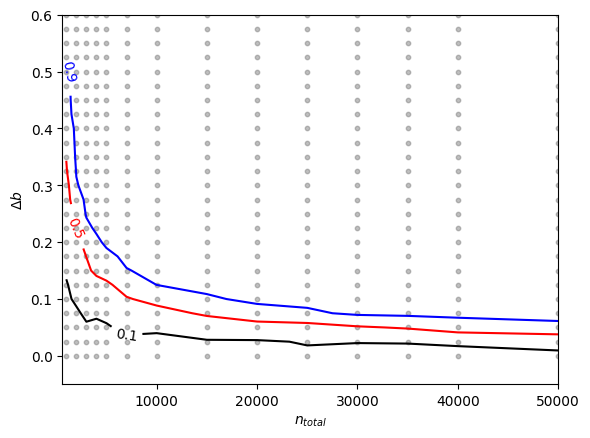

In [11]:
# plot the contour plot
plt.figure()
Contourrange = [0.1,0.5,0.9]
CS = plt.contour(n_totals, delta_bs, p_val_grid, levels=Contourrange, colors=['k','r','b'])
plt.clabel(CS, fontsize=10, inline=1)


# plot grid points
for ii, delta_b in enumerate(delta_bs):
    for jj, n_total in enumerate(n_totals):
        plt.scatter(n_total, delta_b, color='grey', alpha=0.5, s=10)
plt.ylim(-0.05, 0.6)
plt.xlim(600, 50000)

plt.xlabel('$n_{total}$')
plt.ylabel('$\Delta b$')

# Lengthscale

In [23]:
import sys
sys.path.insert(0, "/Users/aron/polybox/Projects/b_significant")

import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import pandas as pd

from functions.eval_functions import mu_sigma_mac

In [26]:
n_total = 40000
cutting = "constant_idx"

delta_bs = np.arange(0.05, 0.3, 0.1)
length_scales = np.arange(100, 2000, 150)
sim_numbers = np.arange(0, 50, 1)

all_permutations = [
    i
    for i in it.product(
        delta_bs,
        sim_numbers,
        length_scales,
    )
]
all_permutations = np.array(all_permutations)

# parameter vectors to run through with cl_idx
cl_delta_bs = all_permutations[:, 0]
cl_sim_numbers = all_permutations[:, 1].astype(int)
cl_length_scales = all_permutations[:, 2].astype(int)

def get_string_data(cl_idx):
    save_str = (
            "results/length_scale/constant_idx/"
            "acfs" + str(cl_idx) + ".csv"
        )
    return save_str

def get_df():
    all_delta_bs = []
    all_sim_numbers = []
    all_length_scales = []
    all_acfs = []
    all_n_series_used = []
    all_diff_nb = []
    all_diff_one = []
    all_n_bs = []

    for cl_idx in range(len(cl_delta_bs)):
        save_str = get_string_data(cl_idx)
        try :
            acfs = np.genfromtxt('../'+save_str, delimiter=',')
            n_series_used = np.genfromtxt('../'+save_str.replace("acfs", "n_series_used"), delimiter=',')
            diff_nb = np.genfromtxt('../'+save_str.replace("acfs", "diff_nb"), delimiter=',')
            diff_one = np.genfromtxt('../'+save_str.replace("acfs", "diff_one"), delimiter=',')
            n_bs = np.genfromtxt('../'+save_str.replace("acfs", "n_bs"), delimiter=',')
        except :
            acfs = []
            n_series_used = []
            diff_nb = []
            diff_one = []
            n_bs = []

        all_delta_bs.extend([cl_delta_bs[cl_idx]]*len(acfs))
        all_sim_numbers.extend([cl_sim_numbers[cl_idx]]*len(acfs))
        all_length_scales.extend([cl_length_scales[cl_idx]]*len(acfs))
        all_acfs.extend(acfs)
        all_n_series_used.extend(n_series_used)
        all_diff_nb.extend(diff_nb)
        all_diff_one.extend(diff_one)
        all_n_bs.extend(n_bs)

    # make a dataframe
    df = pd.DataFrame({
        "acf": all_acfs,
        "delta b": all_delta_bs,
        "n_b": all_n_bs,
        "length scale": all_length_scales,
        "n_series_used": all_n_series_used,
        "diff_nb": all_diff_nb,
        "diff_one": all_diff_one,
        "simulation no": all_sim_numbers,
    })
    return df

In [27]:
get_df()

,acf,delta b,n_b,length scale,n_series_used,diff_nb,diff_one,simulation no
0,0.024262,0.05,20.0,100,1999.052632,0.063664,0.063340,0
1,0.048422,0.05,30.0,100,1332.379310,0.039508,0.038908,0
2,0.068869,0.05,40.0,100,999.025641,0.029156,0.028364,0
3,0.080356,0.05,50.0,100,799.020408,0.023555,0.022554,0
4,0.088649,0.05,60.0,100,665.694915,0.020042,0.018802,0
...,...,...,...,...,...,...,...,...
143,0.021193,0.05,1450.0,100,26.587302,0.000800,0.003154,0
144,0.017613,0.05,1460.0,100,26.398218,0.000787,0.003137,0
145,0.014091,0.05,1470.0,100,26.211709,0.000790,0.003111,0
146,0.009965,0.05,1480.0,100,26.027721,0.000788,0.003108,0


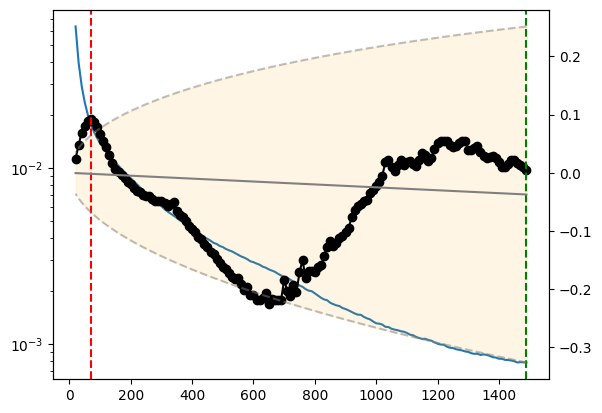

In [30]:
df = get_df()

df_loop = df[df['simulation no'] == 0]

plt.plot(df_loop['n_b'], df_loop['diff_nb'])
# log axis
plt.yscale('log')

# twin ax
ax2 = plt.gca().twinx()
ax2.plot(df_loop['n_b'], df_loop['acf'], color='black', marker='o')
n_max = df_loop['n_b'][np.argmax(df_loop['acf'])]
plt.axvline(n_max, color='red', linestyle='--')
nmin_diff = df_loop['n_b'][np.argmin(df_loop['diff_nb'])]
plt.axvline(nmin_diff, color='green', linestyle='--')

# Plot 0.05 threshold
x = np.arange(n_total/max(df_loop['n_b']), n_total/min(df_loop['n_b']) + 1, 1)
mu, sigma = mu_sigma_mac(x, cutting)
plt.plot(
    n_total / x,
    1.96 * sigma - 1 / x,
    color="grey",
    linestyle="--",
    alpha=0.5,
)
plt.plot(
    n_total / x,
    -1.96 * sigma - 1 / x,
    color="grey",
    linestyle="--",
    alpha=0.5,
)
plt.plot(n_total / x, mu, color="grey", linestyle="-")
plt.fill_between(
    n_total / x,
    1.96 * sigma - 1 / x,
    -1.96 * sigma - 1 / x,
    color="orange",
    alpha=0.1,
    label="95% confidence interval",
)

In [18]:
df

,acf,delta b,n_b,length scale,n_series_used,diff_nb,diff_one,simulation no
0,0.024262,0.05,20.0,100,1999.052632,0.063664,0.063340,0
1,0.048422,0.05,30.0,100,1332.379310,0.039508,0.038908,0
2,0.068869,0.05,40.0,100,999.025641,0.029156,0.028364,0
3,0.080356,0.05,50.0,100,799.020408,0.023555,0.022554,0
4,0.088649,0.05,60.0,100,665.694915,0.020042,0.018802,0
...,...,...,...,...,...,...,...,...
143,0.021193,0.05,1450.0,100,26.587302,0.000800,0.003154,0
144,0.017613,0.05,1460.0,100,26.398218,0.000787,0.003137,0
145,0.014091,0.05,1470.0,100,26.211709,0.000790,0.003111,0
146,0.009965,0.05,1480.0,100,26.027721,0.000788,0.003108,0
